<a href="https://colab.research.google.com/github/Yasu112/daily_report_system/blob/main/20X3142_%E8%97%A4%E5%8E%9F%E8%B3%87%E4%B9%85_%E6%9C%9F%E6%9C%AB%E3%83%AC%E3%83%9D%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 目的

　タイタニック号は1912年に初めての航海で氷山と衝突し沈没した。今回、タイタニック号の乗客リストからどのような人物がなくなりやすい状況だったのかを分析した。


## 2. 方法

　タイタニック号の乗客リストから、男女別や階級別の死亡率や死亡者数を調べた。その後、SVMを用いて生存する乗客と死亡する乗客を分類するモデルを作成した。使用するデータは乗客の名前,性別, 年齢, 社会的な階級や購入した切符の値段が記されている。死亡したか生存したかはSurvivedの値で確認することができ、0が死亡で1が生存を意味している。100年前の記録のため、欠損しているデータがあり、その場合はNaNで示されている。以上を基に、以下の手順で分析を行った。
<br>
１．必要なライブラリのインポート
<br>
２. 今回使うデータの読み込みと確認
<br>
３. データをグラフなどで可視化
<br>
４. SVMを用いた学習
<br>
５. テストデータを用いたテスト結果の確認

## 3. 結果

実行したプログラムとその結果を示す。

3.1 ライブラリのインポート
<br>
必要なライブラリをインポートした。今回使用したのは、pandas, matplotlib, seaborn, numpy, sklearnである。

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
%matplotlib inline

3.2 用いたデータ
<br>
titanicの乗客のリストを以下に示した。

In [35]:
titanic = pd.read_csv("/content/drive/MyDrive/1PCAとSVM/titanic/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


データのインデックスを確認したところ、以下の１２個のデータがあることが確認できた。

In [22]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

3.3 生存率
<br>
データから分かった生存率を求め、円グラフにしてまとめた。

In [23]:
titanic.Survived.mean()

0.3838383838383838

生存率は38%であった。

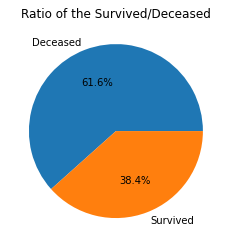

In [24]:
#titanic.groupby(["Sex"]).sum()["Survived"]
plt.pie(titanic["Survived"].value_counts(),labels=["Deceased","Survived"],autopct="%.1f%%")
plt.title("Ratio of the Survived/Deceased")
plt.show()

3.4 男女別の生存人数
<br>
男女それぞれの生存確率を計算した。

In [36]:
titanic.groupby(["Sex"]).sum()["Survived"]

Sex
female    233
male      109
Name: Survived, dtype: int64

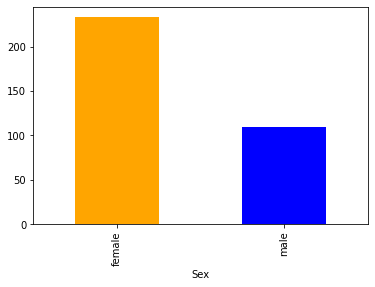

In [37]:
titanic.groupby(["Sex"]).sum()["Survived"].plot.bar(color=['orange', 'blue'])

女性の生存者は233人、男性が109人だった。女性が男性の３倍ほど多く生存していた。

3.5 男女別の生存者、死亡者数
<br>
男女別の生存者、志望者数を以下に示す。

In [38]:
titanic.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

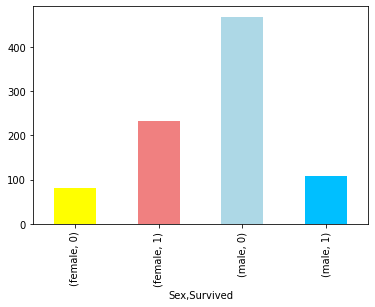

In [39]:
titanic.groupby(["Sex","Survived"])["Survived"].count().plot.bar(color=["yellow","lightcoral","lightblue","deepskyblue"])

人数が多かった順に以下のようになった。
<br>
死亡した男性 > 生存した女性 > 生存した男性 > 死亡した女性

3.6 男女別の生存率
<br>
男女別の生存率を求めた結果以下に示す。

In [43]:
titanic.groupby(["Sex"]).mean()["Survived"]

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

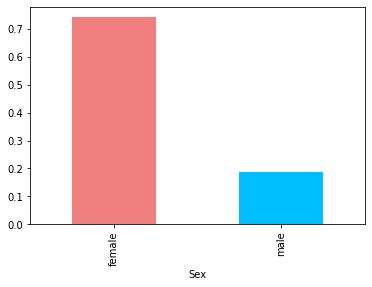

In [44]:
titanic.groupby(["Sex"]).mean()["Survived"].plot.bar(color=["lightcoral","deepskyblue"])

男性の生存率が約19%だったのに対し、女性の生存率は約74%と非常に大きかった。

3.7 社会的階層別の生存率
<br>
社会階級別の生存率を可視化した。Pclassが１が上流階級、2が中流階級、3が下級家庭を表しており、それぞれの生存率は以下の通りになった。

In [45]:
titanic.groupby(["Pclass"]).mean()["Survived"]

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

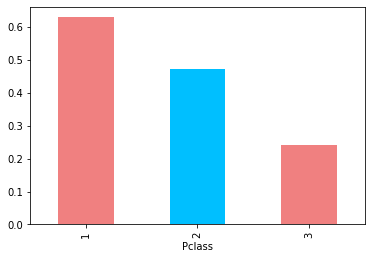

In [46]:
titanic.groupby(["Pclass"]).mean()["Survived"].plot.bar(color=["lightcoral","deepskyblue"])

結果より、上流階級の人ほど、生存率が高いことが確認できた。下級の人に比べ、2.5倍ほど高き確率で助かっていた。

3.8 階級、性別で分けた時の生存率と生存人数
<br>
3.7の結果から、上流階級の人間ほど助かりやすいことが確認できた。さらに、性別でも分けた時、以下のような生存率となった。

In [50]:
titanic.groupby(["Sex","Pclass"])["Survived"].mean()


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

生存率は女性の上流階級であれば約97%が助かったことが確認できた。さらに、女性の中流階級でも生存率が約92%あった。一方、男性は上流階級でも約37%、中流階級だと役16%、下級家庭は約14%だった。

次に、上記の条件での生存者数と死亡者数を棒グラフで示す。

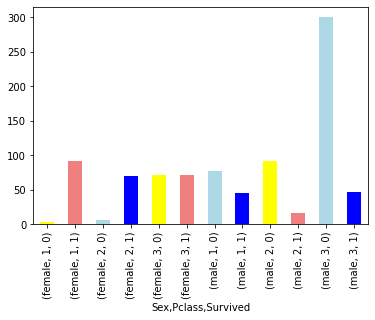

In [42]:
titanic.groupby(["Sex","Pclass","Survived"])["Survived"].count().plot.bar(color=["yellow","lightcoral","lightblue","blue"])

最も人数が多いのは下級家庭の男性の死亡者数であった。そして、最も少ないのは、上流階級の女性の死亡者数であった。

3.9 SVM
<br>
次にデータ中にある文字情報を数値に変換した。乗船クラスのC,S,Qをそれぞれ0,1,2へ、性別はmaleが0、femaleを1とした。さらに、年齢には情報が欠落しているものがあり、CSVファイルではNaNと表示されていた。年齢がNaNでった場合、0に変換する。また、今回の解析で使わないPasengerId, Name, Ticket, Cabinを削除した。

In [9]:
titanic.Embarked = titanic.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
titanic.Sex = titanic.Sex.replace(['male', 'female'], [0, 1])
titanic.Age = titanic.Age.replace('NaN', 0)
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

データ変換後のデータをいかに示す。

In [10]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1.0
887,1,1,1,19.0,0,0,30.0000,1.0
888,0,3,1,NaN,1,2,23.4500,1.0
889,1,1,0,26.0,0,0,30.0000,0.0


In [11]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

次に、学習の前段階処理を行った。

In [13]:
train_labels = titanic['Survived'].values
train_features = titanic
train_features.drop('Survived', axis=1, inplace=True)
train_features = train_features.values.astype(np.int64)

SVMによる学習の実施

In [14]:
sv = svm.LinearSVC()
sv.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

テスト用のデータの読み込み

In [52]:
test = pd.read_csv('/content/drive/MyDrive/1PCAとSVM/titanic/test.csv')

テスト用データは以下の通りである。

In [53]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
test.Embarked = test.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
test.Sex = test.Sex.replace(['male', 'female'], [0, 1])
test.Age = test.Age.replace('NaN', 0)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [17]:
features = test.values.astype(np.int64)
y_test_pred = sv.predict(features)

予測の結果は、以下のようになった。

In [18]:
y_test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 4. 考察

4.1 データと分析方法
<br>
船が沈没するには時間がかかり、それまでに脱出の時間がある。そのため、客室の位置や避難誘導の優先度によって生存が予測できるのではないかと考え、SVMを用いて学習を行った。また、棒グラフを用いてデータを可視化することで、当時にどのような助かる傾向があったのかを判別するために可視化を行った。

4.2 生存傾向
<br>
3の結果より、上流階級と中流階級の女性が高い確率で生存できたことが確認できた。また、男性は上流階級であっても生存率は高くないことが分かった。しかし、社会階級が高いほど、生存率が高かったのは男女ともに確認できた。これは、社会階級が高い人ほど切符に高い額を払うことができる。そのため、船員による避難誘導や救命ボートへの乗船が優先的に行われていたのではないかと考えられる。当時のヨーロッパは男性優位の思想があり、一般的に権力を握っていたのは男性である。また、体力や筋力で優れているのも男性であることが多い。よって、乗客が競ってボートに乗り込もうとした場合、女性より男性が多く生き残れるのではないかと予想できる。しかし、実際の結果は女性が多く生き残っている。これは当時に男性たちが女性の避難を優先したと考えられる。我先にと逃げるのではなく、女性を逃がすことを優先していることから、当時に混乱はあったと思われるが、救命ボートを争うような致命的な混乱は起きていなかったと推察する。以上より、結果として、女性でかつ上流階級が中流階級の人間が生存しすかったと考えられる。

4.3 SVMの結果の検証
<br>
4.2より、SVMも女性が生き残りやすいように学習されたのではないかと考えられる。テストデータとその予測結果を比較してみる。すべては無理なので、0～4と413～417の予測を確認してみると、男性は死亡と予測している一方、女性は生存と判定されていた。よって、SVMの結果は妥当と判断でき、学習は成功したと推察される。